<a href="https://colab.research.google.com/github/Keerthanatata/Credit-card-fraud/blob/main/credit_card_frauds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.metrics import matthews_corrcoef 
from pylab import rcParams
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.DataFrame
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [ ]:
df.duplicated(keep = 'first').sum()

1081

In [ ]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [ ]:
#visualizing some of the original and duplicated rows and 33rd and 35th row is the duplicated row
df[30:36] 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30,24.0,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
31,25.0,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,0.205687,...,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [ ]:
#removing the duplicated rows
df.drop_duplicates(keep ='first',inplace = True)
df.duplicated().sum()

0

In [ ]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
fraud_cases=len(df[df['Class']==1])
print('Number of Fraud Cases:',fraud_cases)

Number of Fraud Cases: 473


In [ ]:
non_fraud_cases=len(df[df['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)


Number of Non Fraud Cases: 283253


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


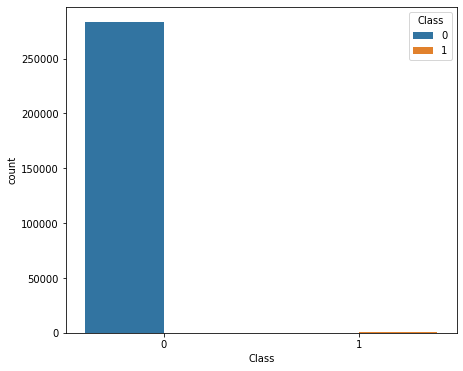

In [ ]:
plt.figure(figsize =(7,6))
sns.countplot(df['Class'],hue= df['Class']);

As we can see that dataset is completely unbalanced and if we do modeling our model might get biased and give the proper accuracy with these imbalanced dataset.So first we will try to balance the dataset by using Understanding method.

In [ ]:
#Splitting our dataset into independent and dependent features
X = df.drop(['Class'],axis = 1)
X.head()
X.shape

 
Y = df['Class']
Y.head()
Y.shape

(283726,)

In [ ]:
#Implementing UnderSampling to handle imbalanced dataset 
under_sampler = RandomUnderSampler()
X_1, Y_1 = under_sampler.fit_resample(X, Y)
X_1.shape
Y_1.shape

(946,)

In [ ]:
X_1.head()
Y_1.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


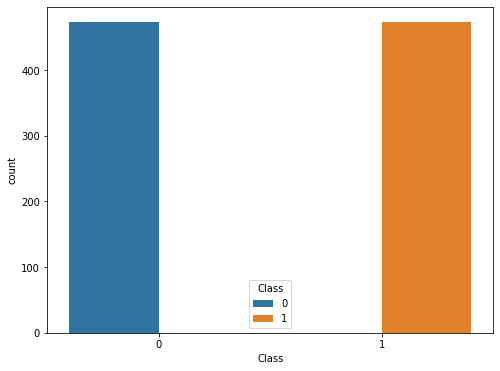

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(Y_1 , hue = Y_1);

As from the above plot we can say that our dataset is now balanced and we can now apply any classification algorithm. So we are applying logistic regression

Class as pie chart:


Text(0, 0.5, '')

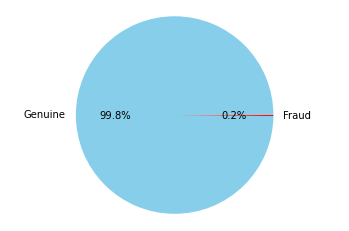

In [ ]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['skyblue','r'])
plt.axis('equal')
plt.ylabel('')


In [ ]:
X_train , X_test,Y_train, Y_test = train_test_split(X_1,Y_1 , test_size =  0.20,random_state = 40)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("Y_train :",Y_train.shape) 
print("Y_test :",Y_test.shape)                                                  

X_train : (756, 30)
X_test : (190, 30)
Y_train : (756,)
Y_test : (190,)


In [ ]:
model = LogisticRegression()
model.fit(X_train , Y_train)

LogisticRegression()

In [ ]:
Y_predicted = model.predict(X_test)
Y_predicted

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
model.score(X_test , Y_test)

0.8947368421052632

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


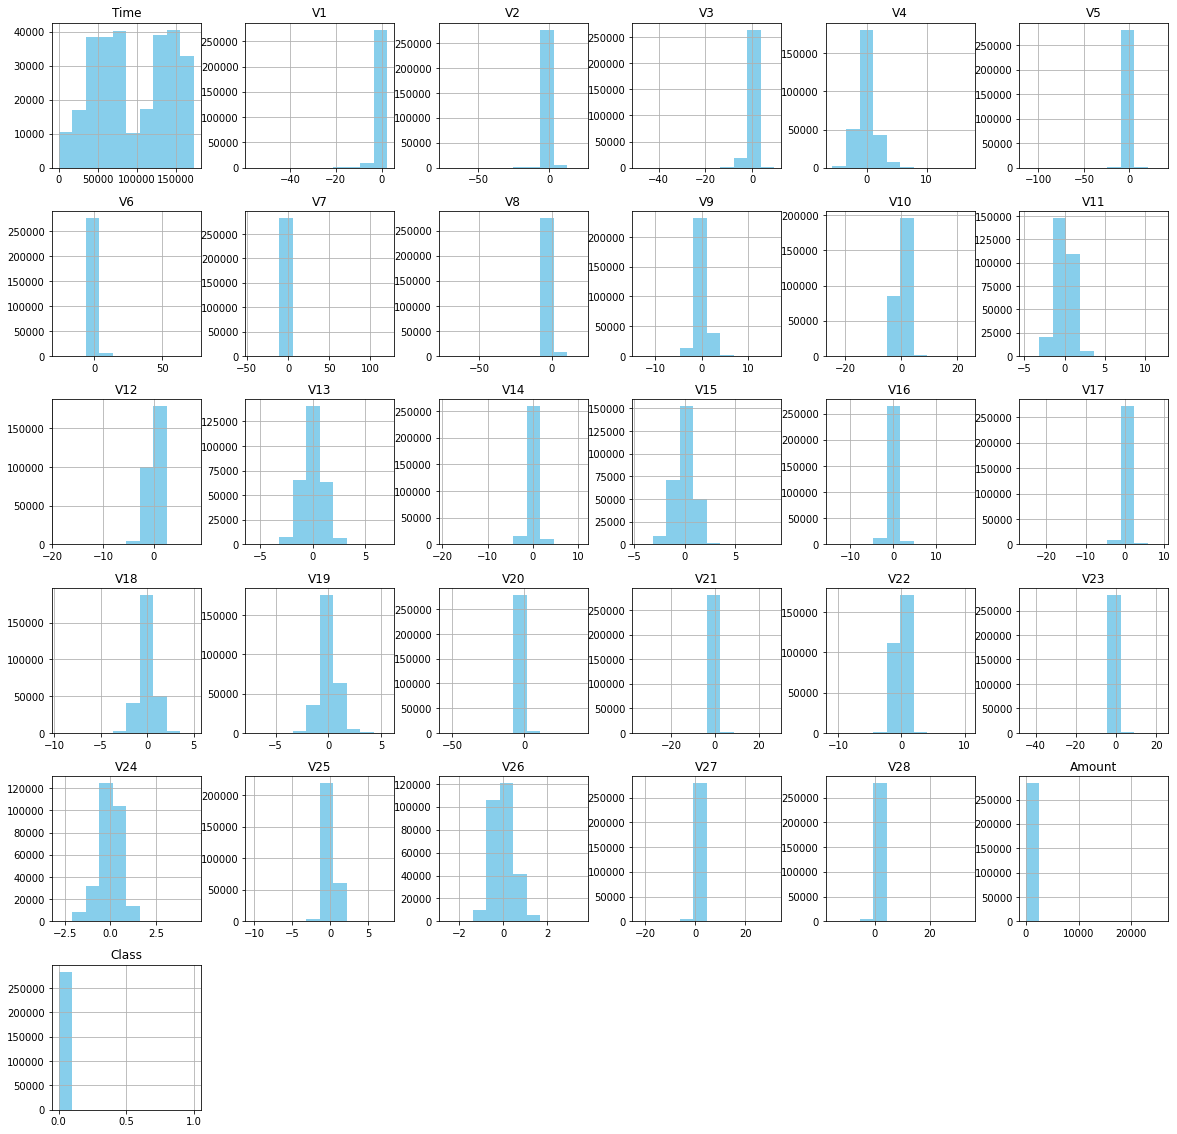

In [ ]:
df.hist(figsize=(20,20),color='skyblue')
plt.show()

In [ ]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344


In [ ]:
model.coef_

array([[-2.19844683e-05, -4.69384117e-01,  3.73753459e-01,
        -7.04736460e-01,  4.43674387e-01, -3.22160171e-01,
        -1.59953591e-01, -5.58238877e-01,  8.79002860e-02,
        -2.61593795e-01, -5.55929966e-01,  3.73202414e-01,
        -6.09573269e-01, -8.45022157e-03, -6.90063225e-01,
        -1.32712731e-02, -4.10071595e-01, -6.72705720e-01,
        -2.31964168e-01,  6.08258306e-02,  3.28118512e-02,
         4.84438278e-02,  7.43164535e-03, -1.11624722e-02,
        -1.24837249e-02,  1.15781904e-02,  2.99360619e-03,
         1.49206071e-02,  1.17202103e-02,  9.53228614e-04]])

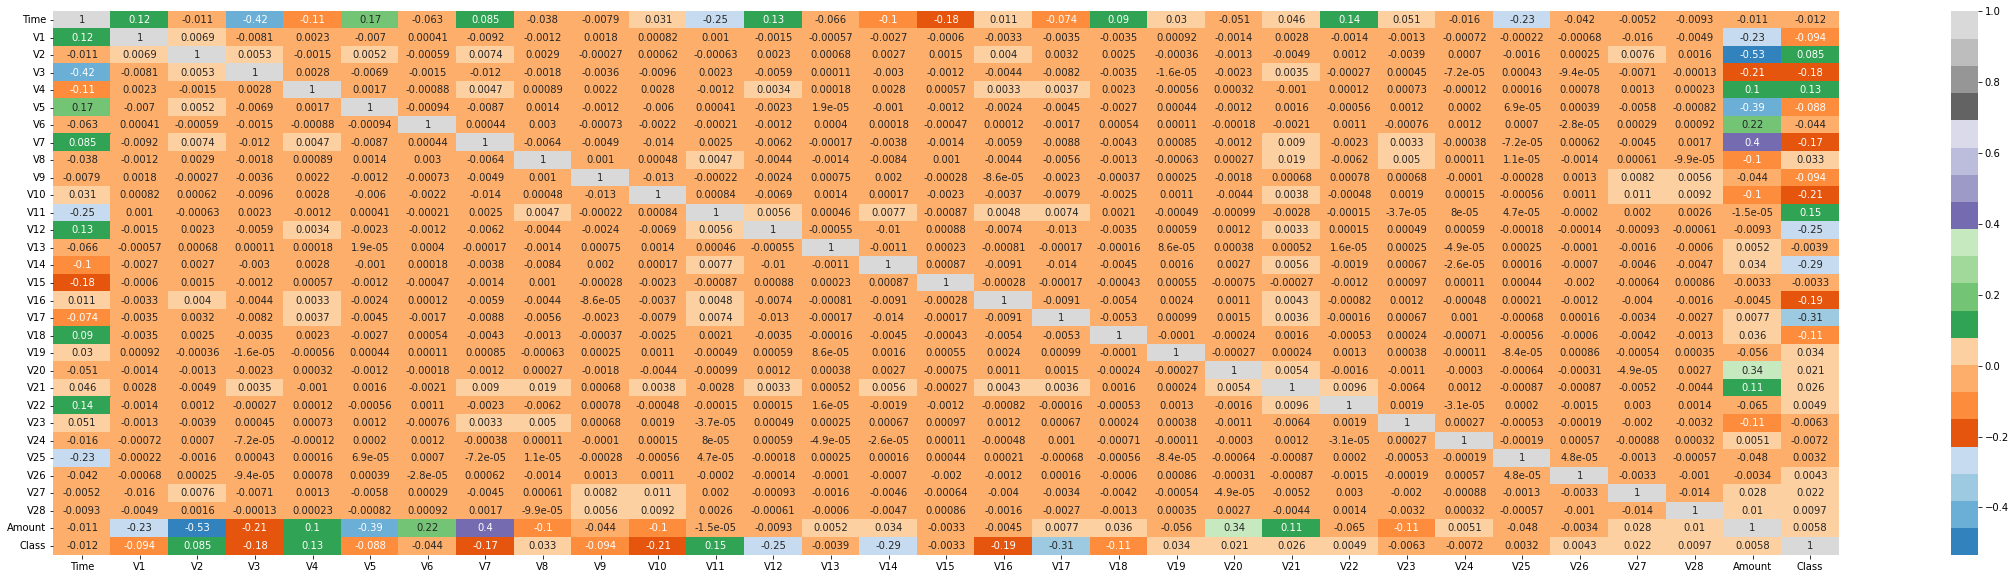

In [ ]:
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

In [ ]:
model.intercept_

array([0.00934757])

In [ ]:
n_outliers = len('Fraud')
n_errors = (Y_predicted != Y_test).sum()
print("The model used is Random Forest classifier")
 
acc = accuracy_score(Y_test,Y_predicted )
print("The accuracy is {}".format(acc))
 
prec = precision_score(Y_test, Y_predicted)
print("The precision is {}".format(prec))
 
rec = recall_score(Y_test, Y_predicted)
print("The recall is {}".format(rec))
 
f1 = f1_score(Y_test, Y_predicted)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(Y_test,Y_predicted)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.8947368421052632
The precision is 0.9204545454545454
The recall is 0.8617021276595744
The F1-Score is 0.8901098901098901
The Matthews correlation coefficient is0.7908917009532693


In [ ]:
cm = confusion_matrix(Y_test , Y_predicted)
print("confusion_matrix : ")
print(cm)
print("accuracy_score :", accuracy_score(Y_test , Y_predicted))
print(classification_report(Y_test , Y_predicted))

confusion_matrix : 
[[89  7]
 [13 81]]
accuracy_score : 0.8947368421052632
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        96
           1       0.92      0.86      0.89        94

    accuracy                           0.89       190
   macro avg       0.90      0.89      0.89       190
weighted avg       0.90      0.89      0.89       190



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        96
           1       0.92      0.86      0.89        94

    accuracy                           0.89       190
   macro avg       0.90      0.89      0.89       190
weighted avg       0.90      0.89      0.89       190



In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))
for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,Y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test.ravel()) 

In [ ]:
knn_predicted_test_labels=knn.predict(X_test)

In [ ]:
knn_accuracy_score  = accuracy_score(Y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(Y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(Y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(Y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(Y_test,knn_predicted_test_labels)

In [ ]:
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(Y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.5842105263157895
Precison --> 0.5925925925925926
Recall --> 0.5106382978723404
F1 --> 0.5485714285714286
MCC --> 0.16872120565241422
              precision    recall  f1-score   support

           0       0.58      0.66      0.61        96
           1       0.59      0.51      0.55        94

    accuracy                           0.58       190
   macro avg       0.59      0.58      0.58       190
weighted avg       0.59      0.58      0.58       190



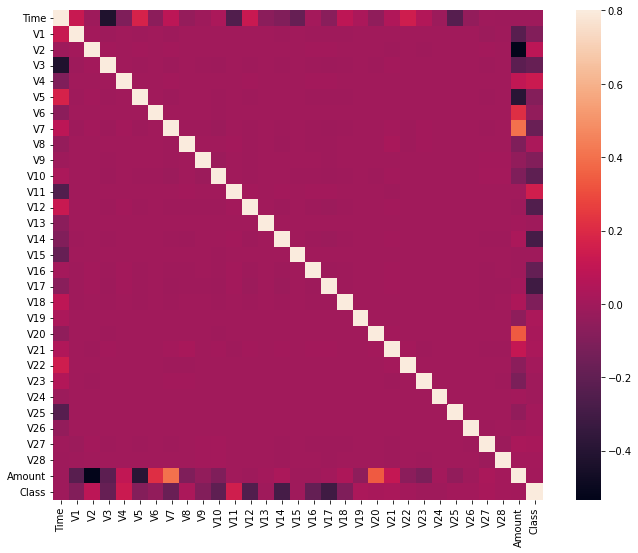

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Visualizing the Confusion Matrix

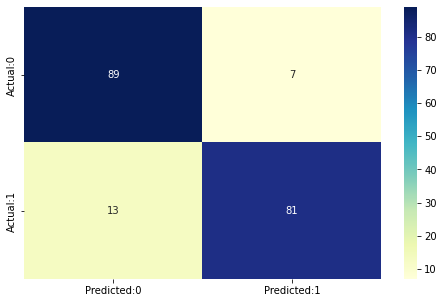

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

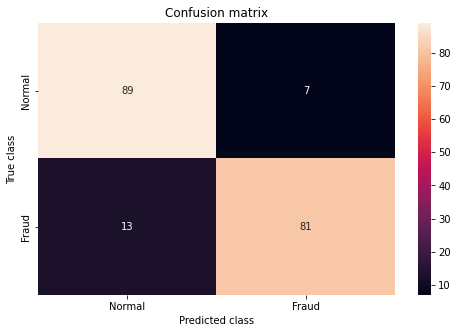

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predicted)
plt.figure(figsize =(8, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

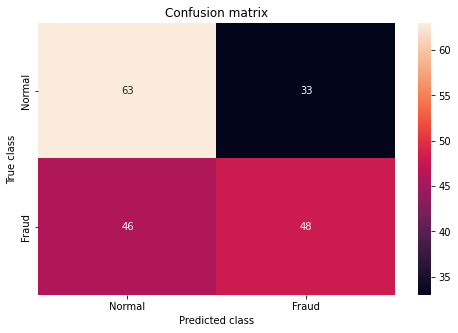

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, knn_predicted_test_labels)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()